In [542]:
import numpy as np

In [543]:
import pandas as pd

In [544]:
import matplotlib.pyplot as plt
%matplotlib inline

In [545]:
from sklearn.datasets import load_breast_cancer

In [546]:
from sklearn.ensemble import RandomForestClassifier

In [547]:
from sklearn.linear_model import SGDClassifier

In [548]:
from sklearn.preprocessing import StandardScaler

In [549]:
from sklearn.model_selection import train_test_split

In [550]:
from sklearn.model_selection import cross_val_score

In [551]:
from sklearn.model_selection import cross_val_predict

In [552]:
from sklearn.metrics import confusion_matrix

In [553]:
from sklearn.metrics import precision_score, recall_score

In [554]:
from sklearn.model_selection import GridSearchCV

In [555]:
breast_cancer = load_breast_cancer()

In [556]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [557]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [558]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [559]:
breast_cancer_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) 

In [560]:
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [561]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [562]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [563]:
breast_cancer_data['status'] = breast_cancer.target

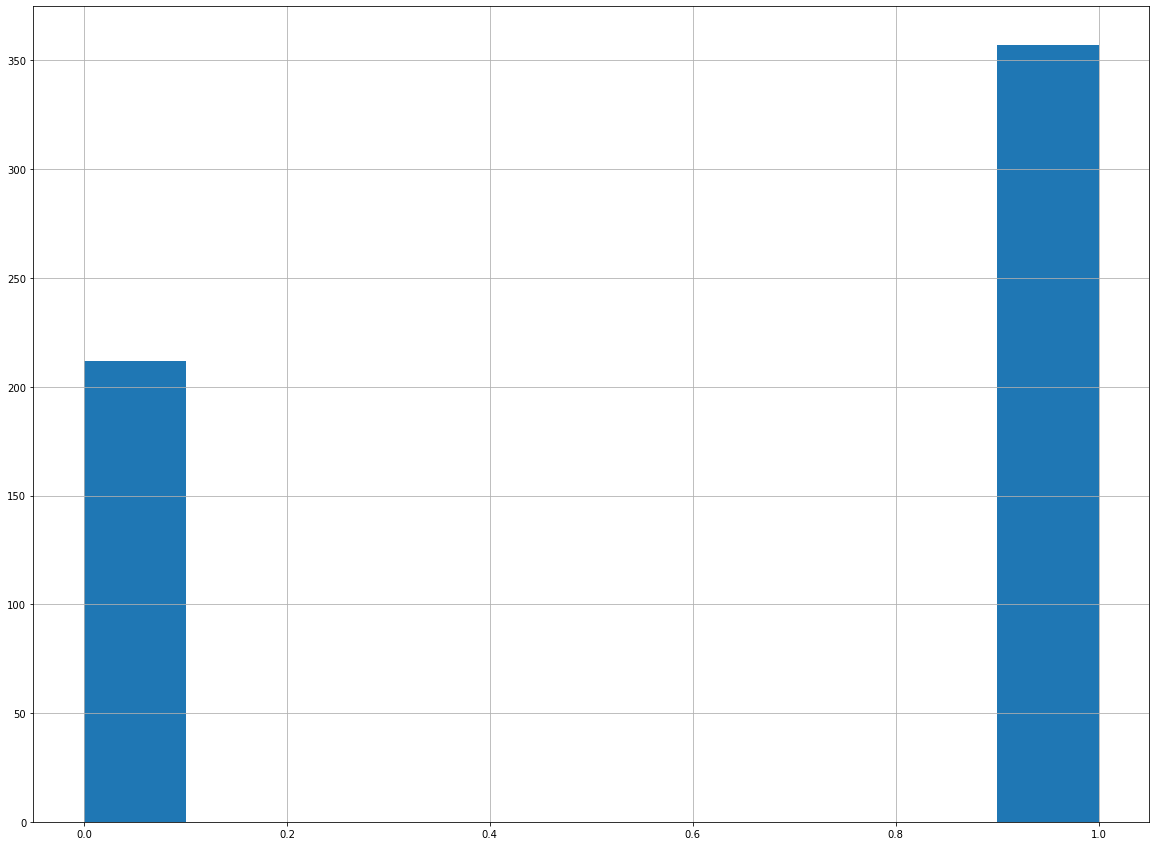

In [564]:
breast_cancer_data['status'].hist(figsize=(20,15))

In [565]:
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [566]:
X_train, X_test = train_test_split(breast_cancer_data, test_size=0.2, random_state=5)

In [567]:
x_train = X_train.drop('status', axis=1)

In [568]:
y_train = X_train['status'].copy()

In [569]:
X_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=3)

# SGDCLASSIFIER

In [570]:
sgd_clf = SGDClassifier()

In [571]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [572]:
scaler = StandardScaler()

In [573]:
x_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [574]:
sgd_clf.fit(x_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [575]:
sgd_y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=5)

In [576]:
confusion_matrix(y_train, sgd_y_train_pred)

array([[123,   6],
       [  5, 230]], dtype=int64)

In [577]:
print('Precision Score:', precision_score(y_train, sgd_y_train_pred))
print('Recall Score:', recall_score(y_train, sgd_y_train_pred))

Precision Score: 0.9745762711864406
Recall Score: 0.9787234042553191


#    RAMDOMFORESTCLASSIFIER

In [578]:
forest_clf = RandomForestClassifier(random_state=2)

In [579]:
forest_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [580]:
forest_y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=5)

In [581]:
confusion_matrix(y_train, forest_y_train_pred)

array([[120,   9],
       [ 11, 224]], dtype=int64)

In [582]:
print('Precision Score:', precision_score(y_train, forest_y_train_pred))
print('Recall Score:', recall_score(y_train, forest_y_train_pred))

Precision Score: 0.9613733905579399
Recall Score: 0.9531914893617022


In [583]:
y_train_prediction = y_train

In [584]:
confusion_matrix(y_train, y_train_prediction)

array([[129,   0],
       [  0, 235]], dtype=int64)

In [585]:
x_val_scaled = scaler.fit_transform(x_val)

In [586]:
val_prediction = forest_clf.predict(x_val_scaled)

In [587]:
val_scores = cross_val_score(forest_clf, x_val_scaled, y_val, cv=5, scoring='accuracy')

print('Scores:', val_scores)
print('Mean:', val_scores.mean())
print('Standard Deviation:', val_scores.std())

Scores: [0.94736842 0.94444444 0.94444444 0.94444444 1.        ]
Mean: 0.956140350877193
Standard Deviation: 0.02195904486025567


In [588]:
confusion_matrix(y_val, val_prediction)

array([[32,  3],
       [ 0, 56]], dtype=int64)

In [589]:
print('Precision Score:', precision_score(y_val, val_prediction))
print('Recall Score:', recall_score(y_val, val_prediction))

Precision Score: 0.9491525423728814
Recall Score: 1.0


In [590]:
val_predicted = pd.DataFrame(val_prediction, columns=['status'])

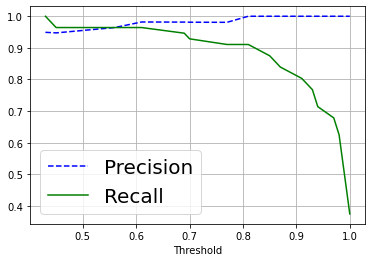

In [603]:
from sklearn.metrics import precision_recall_curve

y_forest_proba = cross_val_predict(forest_clf, x_val_scaled, y_val, cv=5,
                                           method='predict_proba')
y_scores = y_forest_proba[:, 1]# gets the positive probabilities

precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.xlabel('Threshold')
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(fontsize=20)
    plt.grid()

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

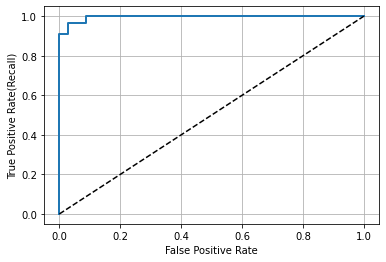

In [604]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')# dashed diagonal
    plt.grid()
plot_roc_curve(fpr, tpr)

In [605]:
from sklearn.metrics import roc_auc_score

ras = roc_auc_score(y_val, y_scores)
print('ROC_AUC_SCORE:', ras)

ROC_AUC_SCORE: 0.9954081632653061


In [606]:
x_test = X_test.drop('status', axis=1)
y_test = X_test['status']

In [607]:
X_test_scaled = scaler.transform(x_test)

In [608]:
final_model = forest_clf

In [609]:
final_predictions = final_model.predict(X_test_scaled)

In [611]:
final_predicted = pd.DataFrame(final_predictions, columns=['status'])
final_predicted.head()

,status
0,0
1,1
2,1
3,1
4,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BE661D9C8>]],
      dtype=object)

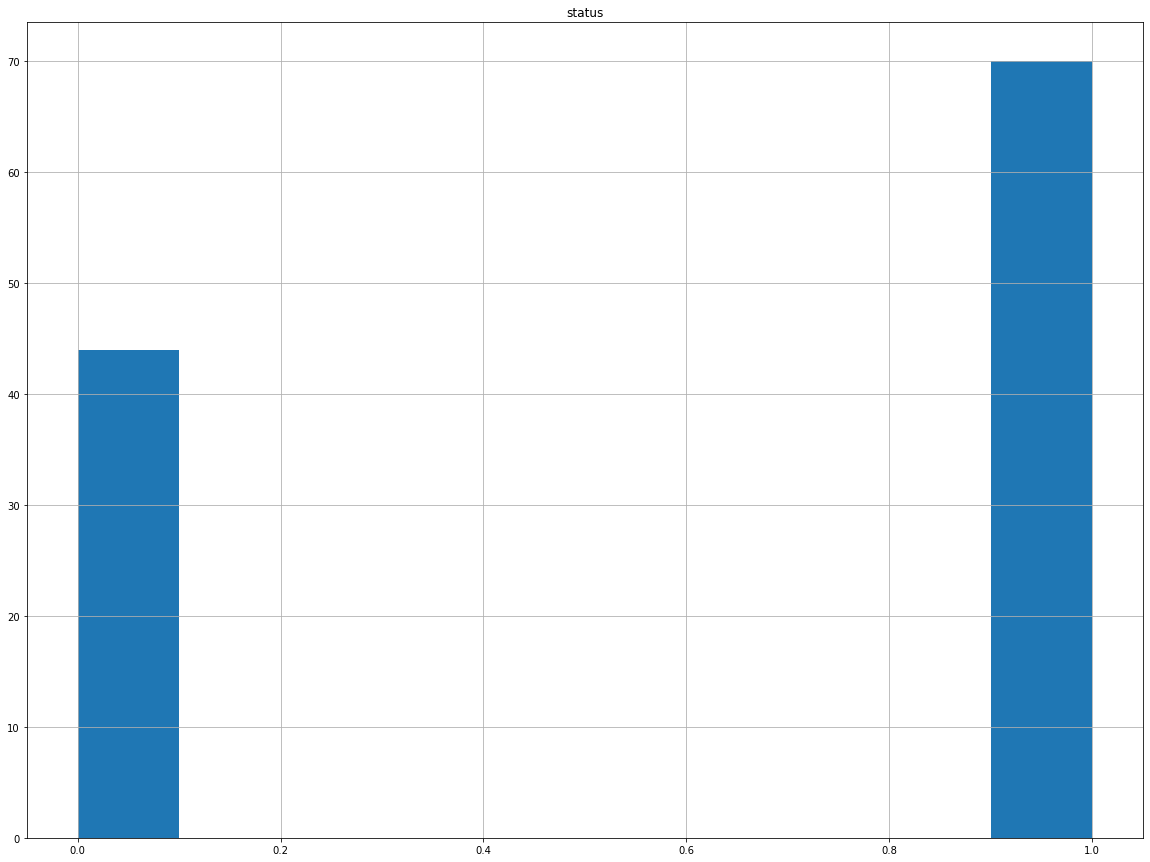

In [613]:
final_predicted.hist(figsize=(20, 15))
#visualising the predicte values

In [612]:
final_predicted.to_csv('breast_cancer_predicted.csv', index=False)